In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from scipy.optimize import minimize
import fixed_income_derivatives_E2024 as fid

# Data Processing

In [ ]:
Yield_Curve_3M  = "/Users/williammousten/Desktop/ECB/ECB_3M.csv"
Yield_Curve_6M  = "/Users/williammousten/Desktop/ECB/ECB_6M.csv"
Yield_Curve_1Y  = "/Users/williammousten/Desktop/ECB/ECB_1Y.csv"
Yield_Curve_2Y  = "/Users/williammousten/Desktop/ECB/ECB_2Y.csv"
Yield_Curve_5Y  = "/Users/williammousten/Desktop/ECB/ECB_5Y.csv"
Yield_Curve_10Y = "/Users/williammousten/Desktop/ECB/ECB_10Y.csv"
Yield_Curve_15Y = "/Users/williammousten/Desktop/ECB/ECB_15Y.csv"
Yield_Curve_20Y = "/Users/williammousten/Desktop/ECB/ECB_20Y.csv"
Yield_Curve_30Y = "/Users/williammousten/Desktop/ECB/ECB_30Y.csv"

def load_and_rename(csv_path, yield_col_new_name, date_col="DATE"):
    df = pd.read_csv(csv_path)
    df.columns = df.columns.str.strip()
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
    df = df.dropna(subset=[date_col])
    old_yield_col = df.columns[-1]
    df = df.rename(columns={old_yield_col: yield_col_new_name})
    return df[[date_col, yield_col_new_name]]

df_3m  = load_and_rename(Yield_Curve_3M,  "3M")
df_6m  = load_and_rename(Yield_Curve_6M,  "6M")
df_1y  = load_and_rename(Yield_Curve_1Y,  "1Y")
df_2y  = load_and_rename(Yield_Curve_2Y,  "2Y")
df_5y  = load_and_rename(Yield_Curve_5Y,  "5Y")
df_10y = load_and_rename(Yield_Curve_10Y, "10Y")
df_15y = load_and_rename(Yield_Curve_15Y, "15Y")
df_20y = load_and_rename(Yield_Curve_20Y, "20Y")
df_30y = load_and_rename(Yield_Curve_30Y, "30Y")


dfs = [df_3m, df_6m, df_1y, df_2y, df_5y, df_10y, df_15y, df_20y, df_30y]
df_merged = dfs[0]
for df in dfs[1:]:
    df_merged = pd.merge(df_merged, df, how="outer", on="DATE")

df_merged = df_merged.sort_values(by="DATE").reset_index(drop=True)
start_date = pd.Timestamp("2005-01-01")
end_date = pd.Timestamp("2025-01-01")
df_merged = df_merged[(df_merged["DATE"] >= start_date) & (df_merged["DATE"] < end_date)]
ordered_columns = ["DATE", "3M", "6M", "1Y", "2Y", "5Y", "10Y", "15Y", "20Y", "30Y"]
df_merged = df_merged[ordered_columns]

print(df_merged.head(10))
print(df_merged.columns)

         DATE        3M        6M        1Y        2Y        5Y       10Y  \
85 2005-01-03  2.109629  2.151024  2.239782  2.430961  2.993412  3.661840   
86 2005-01-04  2.055906  2.115073  2.231982  2.457144  3.034202  3.668323   
87 2005-01-05  2.064858  2.126695  2.248179  2.479969  3.064513  3.695968   
88 2005-01-06  2.060515  2.107919  2.207488  2.415567  2.998407  3.652554   
89 2005-01-07  2.048016  2.092720  2.187889  2.390159  2.967263  3.621110   
90 2005-01-10  2.034898  2.081488  2.179831  2.386555  2.968441  3.621085   
91 2005-01-11  2.062037  2.107914  2.204538  2.407134  2.976360  3.615339   
92 2005-01-12  2.062085  2.108843  2.206971  2.411769  2.984051  3.624260   
93 2005-01-13  2.052742  2.090332  2.174735  2.365086  2.936373  3.588908   
94 2005-01-14  2.056923  2.097316  2.185829  2.379951  2.945857  3.580548   

         15Y       20Y       30Y  
85  4.041248  4.261873  4.493401  
86  4.025906  4.236022  4.458392  
87  4.048378  4.254532  4.472248  
88  4.008271

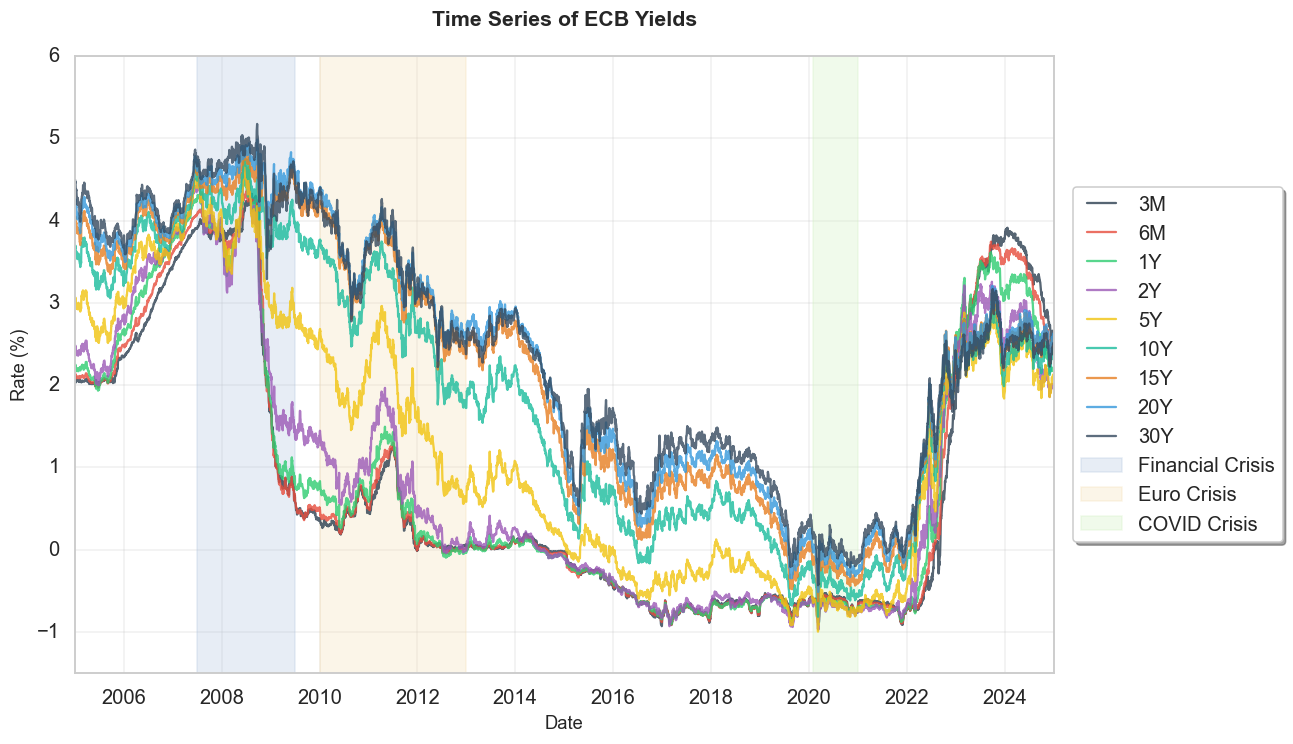

In [83]:
# Import seaborn
import seaborn as sns

# Set seaborn style and context
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Define constants
MATURITIES = ["DATE", "3M", "6M", "1Y", "2Y", "5Y", "10Y", "15Y", "20Y", "30Y"]
YIELD_COLS = MATURITIES[1:]
CRISIS_PERIODS = {
    "Financial Crisis": ("2007-07-01", "2009-06-30", "#B0C4DE"),
    "Euro Crisis": ("2010-01-01", "2012-12-31", "#F5DEB3"),
    "COVID Crisis": ("2020-02-01", "2020-12-31", "#D0F0C0")
}
# Custom color palette
COLORS = [
    '#2C3E50', '#E74C3C', '#2ECC71', '#9B59B6', '#F1C40F',  # Dark colors
    '#1ABC9C', '#E67E22', '#3498DB', '#34495E'              # Light colors
]

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Plot yield curves with improved styling
for col, color in zip(YIELD_COLS, COLORS):
    ax.plot(df_merged["DATE"], df_merged[col], 
            label=col, color=color, 
            linewidth=1.5, alpha=0.8)

# Add crisis periods with improved transparency
for crisis, (start, end, color) in CRISIS_PERIODS.items():
    ax.axvspan(
        pd.to_datetime(start), 
        pd.to_datetime(end),
        color=color, 
        alpha=0.3, 
        label=crisis
    )

# Configure axes
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim([pd.Timestamp("2005-01-01"), pd.Timestamp("2025-01-01")])
ax.set_ylim(bottom=-1.5)

# Add labels and title with improved styling
ax.set_title("Time Series of ECB Yields", 
             pad=20, fontsize=14, fontweight='bold')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Rate (%)", fontsize=12)

# Configure legend with improved positioning and style
leg = ax.legend(bbox_to_anchor=(1.02, 0.5),
                loc='center left',
                borderaxespad=0,
                frameon=True,
                fancybox=True,
                shadow=True)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
print(df_merged.head()) 
print(df_merged.info())  

         DATE        3M        6M        1Y        2Y        5Y       10Y  \
85 2005-01-03  2.109629  2.151024  2.239782  2.430961  2.993412  3.661840   
86 2005-01-04  2.055906  2.115073  2.231982  2.457144  3.034202  3.668323   
87 2005-01-05  2.064858  2.126695  2.248179  2.479969  3.064513  3.695968   
88 2005-01-06  2.060515  2.107919  2.207488  2.415567  2.998407  3.652554   
89 2005-01-07  2.048016  2.092720  2.187889  2.390159  2.967263  3.621110   

         15Y       20Y       30Y  
85  4.041248  4.261873  4.493401  
86  4.025906  4.236022  4.458392  
87  4.048378  4.254532  4.472248  
88  4.008271  4.210780  4.421138  
89  3.977092  4.179653  4.389998  
<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 85 to 5194
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    5110 non-null   datetime64[ns]
 1   3M      5110 non-null   float64       
 2   6M      5110 non-null   float64       
 3  

In [49]:
latest_row = df_merged.iloc[-1]  
T = np.array([0.25, 0.5, 1.0, 2.0, 5.0, 10.0, 15.0, 20.0, 30.0])  
maturities = ["3M", "6M", "1Y", "2Y", "5Y", "10Y", "15Y", "20Y", "30Y"]
R = np.array([latest_row[col] if col in latest_row and pd.notna(latest_row[col]) else np.nan for col in maturities], dtype=float)
calibration_date = pd.to_datetime(latest_row["DATE"]).date()
print("Calibration date:", calibration_date)
print("T:", T)
print("R:", R)

Calibration date: 2024-12-30
T: [ 0.25  0.5   1.    2.    5.   10.   15.   20.   30.  ]
R: [2.575177 2.401606 2.178646 2.011151 2.130018 2.447304 2.598727 2.629104
 2.513773]


In [69]:
yield_cols = ["3M", "6M", "1Y", "2Y", "5Y", "10Y", "15Y", "20Y", "30Y"]

desc_stats = {
    "Mean": [],
    "Std Error": [],
    "Median": [],
    "Mode": [],
    "Std Dev": [],
    "Variance": [],
    "Kurtosis": [],
    "Skewness": [],
    "Range": [],
    "Min": [],
    "Max": [],
    "Count": []
}
for col in yield_cols:
    data = df_merged[col].dropna()
    mode_vals = data.mode()
    mode_val = mode_vals.iloc[0] if len(mode_vals) > 0 else np.nan

    desc_stats["Mean"].append(data.mean())
    desc_stats["Std Error"].append(data.std(ddof=1) / np.sqrt(len(data)))
    desc_stats["Median"].append(data.median())
    desc_stats["Mode"].append(mode_val)
    desc_stats["Std Dev"].append(data.std(ddof=1))
    desc_stats["Variance"].append(data.var(ddof=1))
    desc_stats["Kurtosis"].append(data.kurtosis())
    desc_stats["Skewness"].append(data.skew())
    desc_stats["Range"].append(data.max() - data.min())
    desc_stats["Min"].append(data.min())
    desc_stats["Max"].append(data.max())
    desc_stats["Count"].append(len(data)) 


df_stats = pd.DataFrame(desc_stats).T
df_stats.columns = yield_cols
df_stats.loc["Count"] = df_stats.loc["Count"].astype(int)

print(df_stats)

                    3M           6M           1Y           2Y           5Y  \
Mean          0.833540     0.854377     0.887082     0.962656     1.336117   
Std Error     0.022923     0.023119     0.023052     0.022616     0.022100   
Median        0.073878     0.084537     0.118223     0.298382     1.060883   
Mode         -0.645387    -0.743762    -0.742734    -0.723510    -0.680158   
Std Dev       1.638628     1.652610     1.647885     1.616716     1.579775   
Variance      2.685103     2.731119     2.715526     2.613772     2.495690   
Kurtosis     -0.878500    -0.938109    -0.972343    -1.022177    -1.274575   
Skewness      0.808205     0.775374     0.716578     0.589456     0.253827   
Range         5.255438     5.271636     5.452536     5.684371     5.726582   
Min          -0.929979    -0.914679    -0.912983    -0.970607    -0.996219   
Max           4.325459     4.356957     4.539553     4.713764     4.730363   
Count      5110.000000  5110.000000  5110.000000  5110.000000  5

# Vasicek Calibration, Error Analysis and Monte Carlo Simulation


Average Vasicek Parameters:
r₀    = 0.6606%
a     = 0.2421
b     = 0.7124%
σ     = 1.1009%

Error Metrics:
Overall RMSE     = 0.001522
Overall MAE      = 0.001185

Yield Curve Fit Metrics:
RMSE = 0.000876
MAE  = 0.000713

Monte Carlo Statistics (T = 5 years):
Mean Rate         : 2.26%
Standard Deviation: 1.52%
5th Percentile   : -0.21%
95th Percentile  : 4.67%


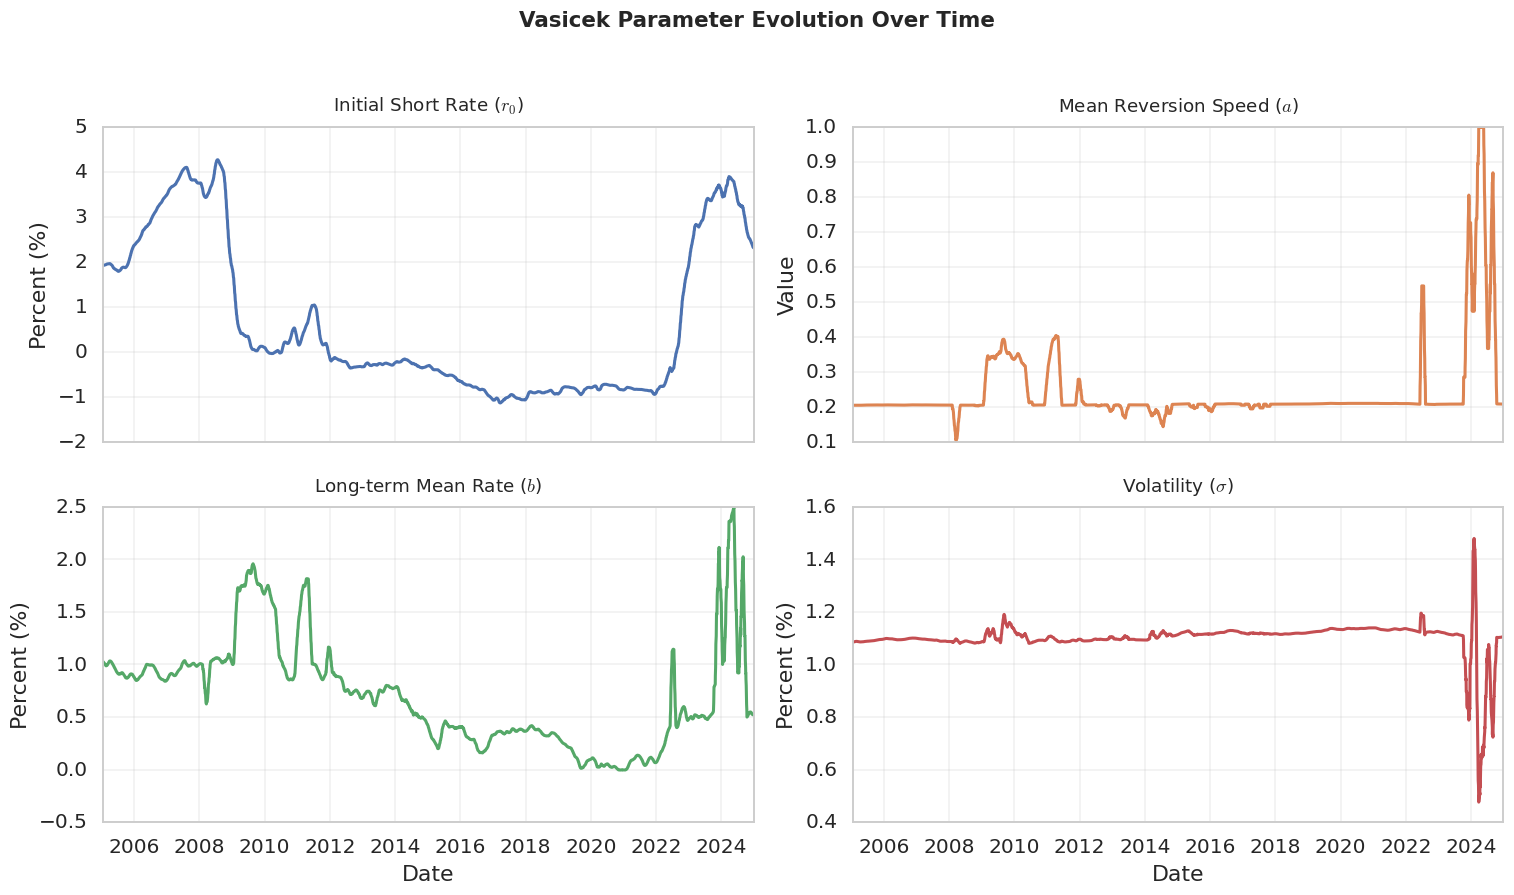

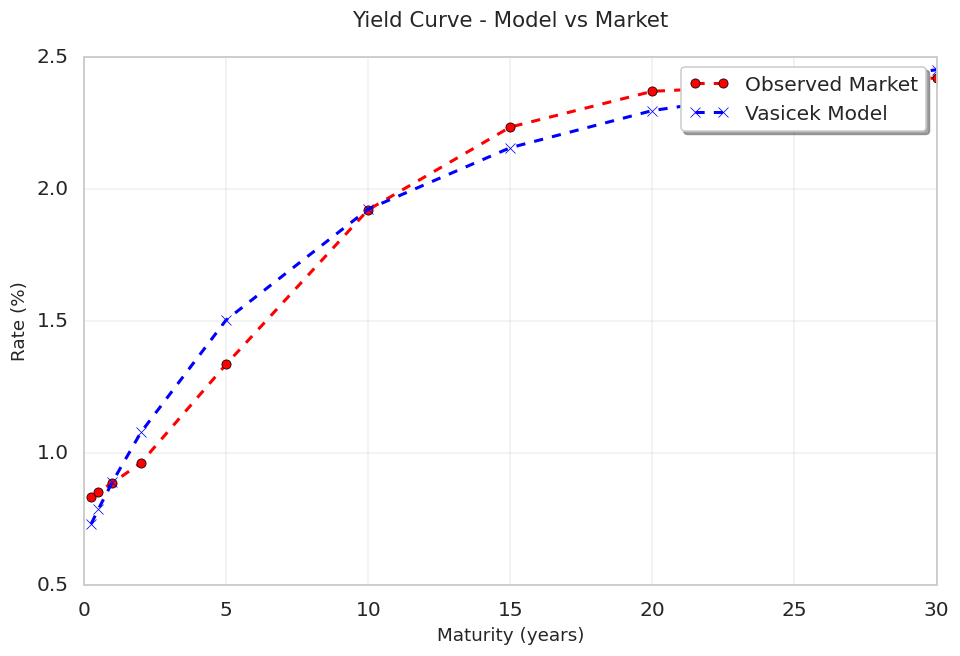

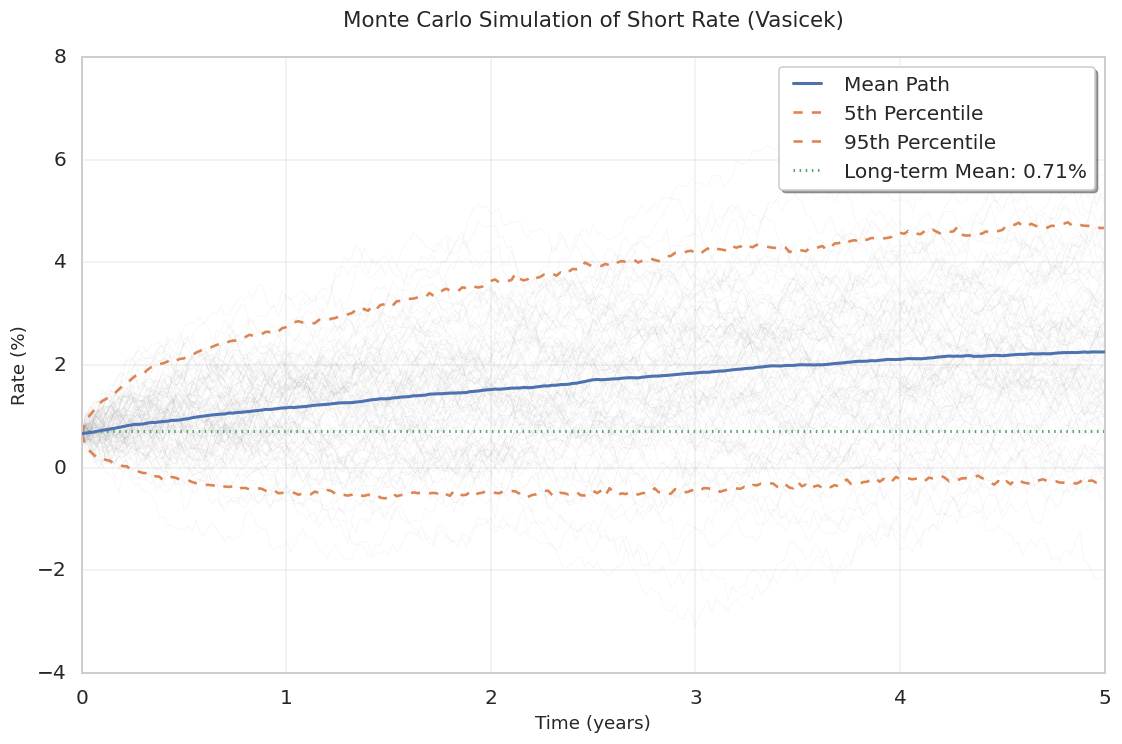

In [82]:
# -----------------------------------------------------------------------------#
# 1) SETUP AND CONFIGURATION
# -----------------------------------------------------------------------------#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy.optimize import minimize
import fixed_income_derivatives_E2024 as fid

# Configure plot style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
plt.rcParams.update({
    "figure.dpi": 110,
    'font.family': 'DejaVu Sans',
    'axes.grid': True,
    'grid.alpha': 0.3
})

# -----------------------------------------------------------------------------#
# 2) MODEL CALIBRATION
# -----------------------------------------------------------------------------#
# Data preparation
df_merged["DATE"] = pd.to_datetime(df_merged["DATE"])
T = np.array([0.25, 0.5, 1.0, 2.0, 5.0, 10.0, 15.0, 20.0, 30.0])
rate_cols = ["3M", "6M", "1Y", "2Y", "5Y", "10Y", "15Y", "20Y", "30Y"]

# Initialize storage
param_records = []
error_records = []
vasicek_yields = []
market_yields = []

# Calibration settings, bounds can be adjusted
# r0: Initial short rate, a: Mean reversion speed, b: Long-term mean rate, sigma: Volatility
bounds = [
    (-1.0, 5.0),     # r0: [-100%, 500%]
    (0.05, 1.0),     # a: [5%, 100%]
    (-1.0, 3.0),     # b: [-100%, 300%]
    (0.001, 0.05)    # sigma: [0.1%, 5%]
]

# Calibrate for each date
for _, row in df_merged.iterrows():
    R_market = row[rate_cols].astype(float).values / 100.0
    if np.isnan(R_market).any():
        continue
        
    init_guess = [R_market[0], 0.2, 0.03, 0.01]
    
    res = minimize(
        lambda p: fid.fit_vasicek_obj(p, R_market, T),
        x0=init_guess,
        method="L-BFGS-B",
        bounds=bounds
    )

    if res.success:
        r0, a, b, sigma = res.x
        R_model = fid.spot_rate_vasicek(r0, a, b, sigma, T)
        
        date_i = row["DATE"]
        param_records.append([date_i, r0, a, b, sigma])
        error_records.append([
            date_i,
            np.sqrt(np.mean((R_market - R_model) ** 2)),  # RMSE
            np.mean(np.abs(R_market - R_model))           # MAE
        ])
        vasicek_yields.append(R_model)
        market_yields.append(R_market)
    else:
        print(f"Optimization failed for date {row['DATE']}")

# -----------------------------------------------------------------------------#
# 3) DATA PROCESSING
# -----------------------------------------------------------------------------#
# Create DataFrames
df_params = pd.DataFrame(
    param_records, 
    columns=["DATE", "r0", "a", "b", "sigma"]
).set_index("DATE")

df_errors = pd.DataFrame(
    error_records,
    columns=["DATE", "RMSE", "MAE"]
).set_index("DATE")

# Clean outliers
mask = df_params["sigma"] < 0.05
df_params_clean = df_params[mask]
df_errors_clean = df_errors.loc[df_params_clean.index]

# Calculate averages
avg_par = df_params_clean.mean()
df_smooth = df_params_clean.rolling(window=30, min_periods=10).mean() # Rolling average can be adjusted if needed 

# Print results
print("\nAverage Vasicek Parameters:")
print(f"r₀    = {avg_par['r0']*100:.4f}%")
print(f"a     = {avg_par['a']:.4f}")
print(f"b     = {avg_par['b']*100:.4f}%")
print(f"σ     = {avg_par['sigma']*100:.4f}%")

print("\nError Metrics:")
print(f"Overall RMSE     = {np.sqrt(np.mean(df_errors_clean['RMSE']**2)):.6f}")
print(f"Overall MAE      = {df_errors_clean['MAE'].mean():.6f}")

# -----------------------------------------------------------------------------#
# 4) PARAMETER EVOLUTION PLOTS
# -----------------------------------------------------------------------------#
# Setup subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
axs = axs.flatten()

# Define plot parameters
param_names = ["r0", "a", "b", "sigma"]
titles = [
    "Initial Short Rate ($r_0$)", 
    "Mean Reversion Speed ($a$)",
    "Long-term Mean Rate ($b$)", 
    "Volatility ($\\sigma$)"
]
colors = sns.color_palette("deep", n_colors=4)

# Create parameter evolution plots
for i, (param, title, color) in enumerate(zip(param_names, titles, colors)):
    y = df_smooth[param] * 100 if param != 'a' else df_smooth[param]
    axs[i].plot(df_smooth.index, y, color=color, linewidth=2)
    axs[i].set_title(title, fontsize=12, pad=10)
    
    if param != 'a':
        axs[i].set_ylabel("Percent (%)")
    else:
        axs[i].set_ylabel("Value")
    
    axs[i].xaxis.set_major_locator(mdates.YearLocator(2))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    if i >= 2:
        axs[i].set_xlabel("Date")

plt.suptitle("Vasicek Parameter Evolution Over Time", 
            fontsize=14, weight='bold', y=1.02)
plt.tight_layout()

# -----------------------------------------------------------------------------#
# 5) YIELD CURVE COMPARISON
# -----------------------------------------------------------------------------#
# Calculate average curves
market_arr = np.array(market_yields)
vasicek_arr = np.array(vasicek_yields)
avg_market = market_arr.mean(axis=0)
avg_vasicek = vasicek_arr.mean(axis=0)

# Calculate fit metrics
rmse = np.sqrt(np.mean((avg_market - avg_vasicek) ** 2))
mae = np.mean(np.abs(avg_market - avg_vasicek))

# Plot yield curves
plt.figure(figsize=(10, 6))
plt.plot(T, avg_market*100, "ro--", label="Observed Market", linewidth=2)
plt.plot(T, avg_vasicek*100, "bx--", label="Vasicek Model", linewidth=2)
plt.title("Yield Curve - Model vs Market", fontsize=14, pad=20)
plt.xlabel("Maturity (years)", fontsize=12)
plt.ylabel("Rate (%)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(frameon=True, fancybox=True, shadow=True)

print("\nYield Curve Fit Metrics:")
print(f"RMSE = {rmse:.6f}")
print(f"MAE  = {mae:.6f}")

# -----------------------------------------------------------------------------#
# 6) MONTE CARLO SIMULATION
# -----------------------------------------------------------------------------#
np.random.seed(42)
M, T_sim, n_paths = 250, 5, 1000
time_grid = np.linspace(0, T_sim, M+1)

# Generate paths
r0, a, b, sigma = avg_par.values
all_paths = np.array([
    fid.simul_vasicek(r0, a, b, sigma, M, T_sim, method="exact")
    for _ in range(n_paths)
])

# Calculate statistics
mean_path = all_paths.mean(axis=0)
std_path = all_paths.std(axis=0)
pct5, pct95 = np.percentile(all_paths, [5, 95], axis=0)

# Plot Monte Carlo simulation
plt.figure(figsize=(12, 7))
for path in all_paths[:100]:
    plt.plot(time_grid, path*100, lw=0.5, alpha=0.08, color="gray")
    
plt.plot(time_grid, mean_path*100, color=colors[0], lw=2, label="Mean Path", zorder=3)
plt.plot(time_grid, pct5*100, color=colors[1], ls="--", lw=1.7, label="5th Percentile")
plt.plot(time_grid, pct95*100, color=colors[1], ls="--", lw=1.7, label="95th Percentile")
plt.axhline(b*100, ls=":", color=colors[2], lw=2,
            label=f"Long-term Mean: {b*100:.2f}%")

plt.title("Monte Carlo Simulation of Short Rate (Vasicek)", fontsize=14, pad=20)
plt.xlabel("Time (years)", fontsize=12)
plt.ylabel("Rate (%)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(frameon=True, fancybox=True, shadow=True)

print("\nMonte Carlo Statistics (T = 5 years):")
print(f"Mean Rate         : {mean_path[-1]*100:.2f}%")
print(f"Standard Deviation: {std_path[-1]*100:.2f}%")
print(f"5th Percentile   : {pct5[-1]*100:.2f}%")
print(f"95th Percentile  : {pct95[-1]*100:.2f}%")

plt.show()

# -----------------------------------------------------------------------------#
# 7) EXPORT RESULTS
# -----------------------------------------------------------------------------#
df_params_clean.to_csv("vasicek_filtered_params.csv")
df_errors_clean.to_csv("vasicek_filtered_errors.csv")